<a href="https://colab.research.google.com/github/syedareehaquasar/SUE---Safe-User-Experience/blob/master/SUE_Flask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flask-ngrok

In [2]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify, render_template
import pickle

In [3]:
model = pickle.load(open('/content/drive/My Drive/SUE/XGBoostClassifier.pickle.dat', 'rb'))

In [4]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=81493dfd233fc37ca80864311d37f15c2aad94d58628b31921cfaf255411d834
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [5]:
%cd "/content/drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Notebook with model and functions

importing Jupyter notebook from PhishingWebsiteDetectionModel.ipynb


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

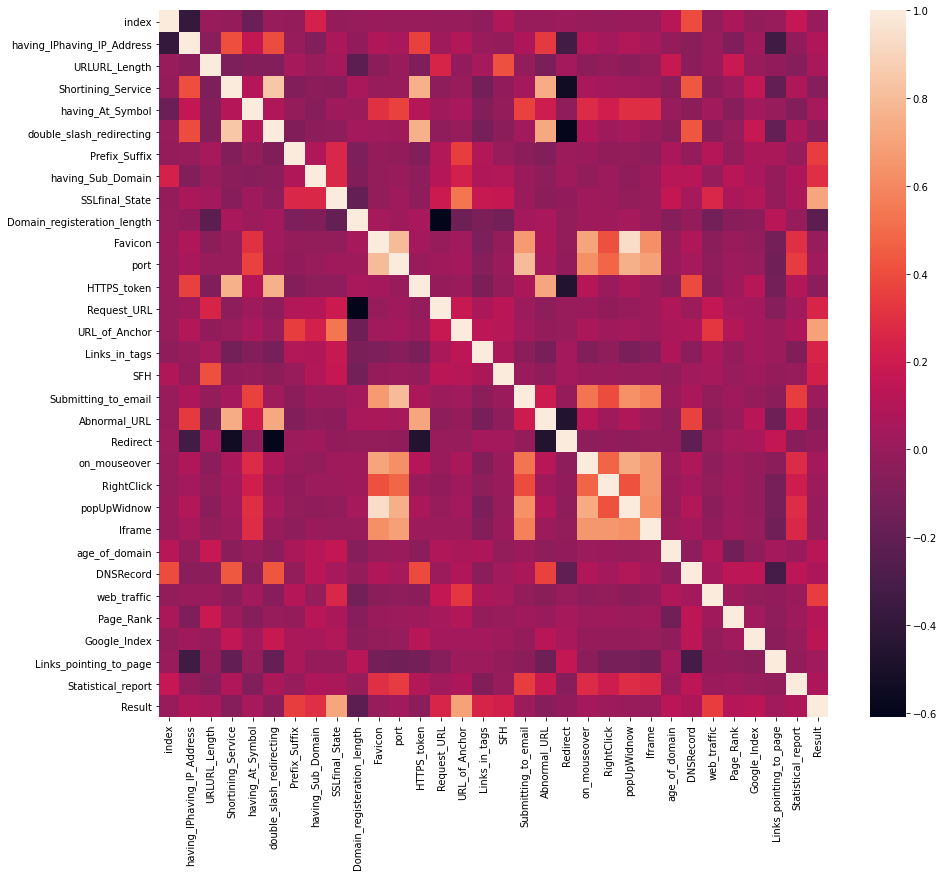

K-Nearest Neighbors: Accuracy on training Data: 0.967
K-Nearest Neighbors: Accuracy on test Data: 0.943
Decision Tree: Accuracy on training Data: 0.927
Decision Tree: Accuracy on test Data: 0.928


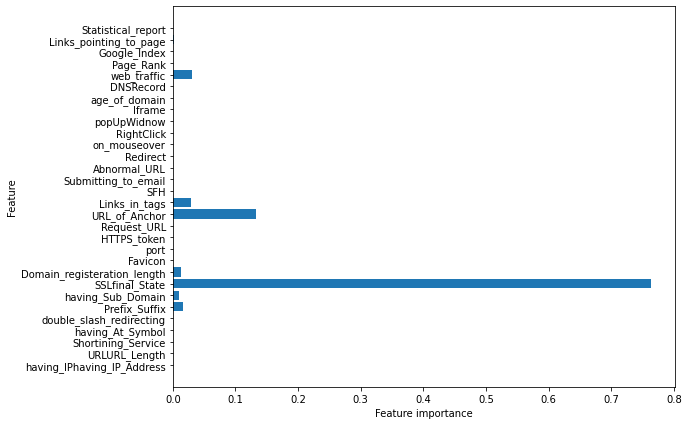

Logistic Regression: Accuracy on training Data: 0.929
Logistic Regression: Accuracy on testing Data: 0.928
Random forest: Accuracy on training Data: 0.932
Random forest: Accuracy on test Data: 0.934


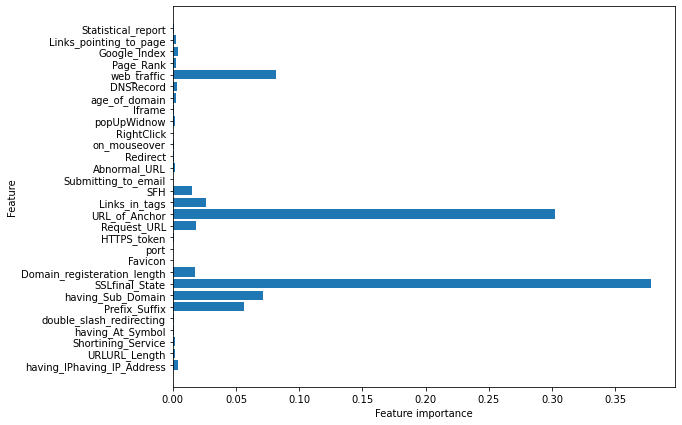

Multilayer Perceptrons: Accuracy on training Data: 0.988
Multilayer Perceptrons: Accuracy on test Data: 0.967
XGBoost: Accuracy on training Data: 0.989
XGBoost : Accuracy on test Data: 0.972
SVM: Accuracy on training Data: 0.929
SVM : Accuracy on test Data: 0.933
     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for whois: filename=whois-0.9.7-cp36-none-any.whl size=8889 sha256=0320bd6e95abe070a2961fbde94942d066474367149f966b517c643a7e1b77e3
  Stored in directory: /root/.cache/pip/wheels/56/4c/53/02bc75ef02bd738b5ee9ece5bd61f86ba25c543aebca583cd2
Successfully built whois
0
[1, 1, 1, 1, 0, 1, 1, -1, 0, 1, 1, 0, -1, 0, 1, 0, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 0]
0


In [6]:
import PhishingWebsiteDetectionModel

In [25]:
app = Flask("Safe_User_Experience", template_folder='/content/drive/My Drive/SUE/templates')
run_with_ngrok(app)


@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict", methods=['POST', 'GET'])
def predict():
  url = request.form.values()
  url_features = PhishingWebsiteDetectionModel.final(url)
  model_input = PhishingWebsiteDetectionModel.pd.DataFrame([url_features], columns = PhishingWebsiteDetectionModel.col)
  prediction = PhishingWebsiteDetectionModel.loaded_model.predict(model_input)
  if prediction.item() == 1:
    return render_template("index.html", pred = 'This is a legitimate Website')
  elif prediction.item() == -1:
    return render_template("index.html", pred = 'This is a Phishing Website')
  else:
    return render_template("index.html", pred = 'This is a suspicious Website')
  

app.run()

 * Serving Flask app "Safe_User_Experience" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://360095fa7c2f.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [26/Aug/2020 20:15:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Aug/2020 20:15:23] "GET /favicon.ico HTTP/1.1" 404 -


0


127.0.0.1 - - [26/Aug/2020 20:15:26] "POST /predict HTTP/1.1" 200 -


0


127.0.0.1 - - [26/Aug/2020 20:15:35] "POST /predict HTTP/1.1" 200 -


0


127.0.0.1 - - [26/Aug/2020 20:15:55] "POST /predict HTTP/1.1" 200 -
